<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Correlation**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform exploratory data analysis (EDA). You will examine the distribution of the data, identify outliers, and determine the correlation between different columns in the dataset.


## Objectives


In this lab, you will perform the following:


- Identify the distribution of compensation data in the dataset.

- Remove outliers to refine the dataset.

- Identify correlations between various features in the dataset.


## Hands on Lab


##### Step 1: Install and Import Required Libraries


In [1]:
# Install the necessary libraries
!pip install pandas
!pip install matplotlib
!pip install seaborn

# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### Step 2: Load the Dataset


In [2]:
# Load the dataset from the given URL
file_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
df = pd.read_csv(file_url)

# Display the first few rows to understand the structure of the dataset
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


<h3>Step 3: Analyze and Visualize Compensation Distribution</h3>


**Task**: Plot the distribution and histogram for `ConvertedCompYearly` to examine the spread of yearly compensation among respondents.


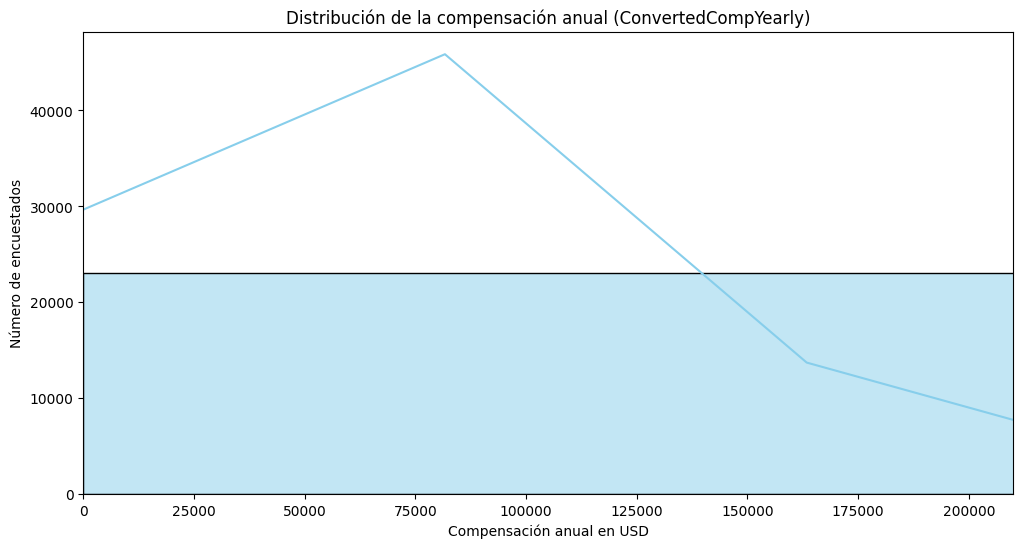

📊 Estadísticas de compensación anual:
Media: $86,155.29
Mediana: $65,000.00
Desviación estándar: $186,756.97
Máximo: $16,256,603.00
Mínimo: $1.00


In [3]:
## Write your code here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1️⃣ Verificar que la columna exista ---
if 'ConvertedCompYearly' not in df.columns:
    raise KeyError("⚠️ La columna 'ConvertedCompYearly' no se encuentra en el DataFrame.")

# --- 2️⃣ Convertir a numérico y eliminar nulos ---
comp = pd.to_numeric(df['ConvertedCompYearly'], errors='coerce').dropna()

# --- 3️⃣ Visualización: Histograma + KDE ---
plt.figure(figsize=(12,6))
sns.histplot(comp, bins=50, kde=True, color='skyblue')
plt.title('Distribución de la compensación anual (ConvertedCompYearly)')
plt.xlabel('Compensación anual en USD')
plt.ylabel('Número de encuestados')
plt.xlim(0, comp.quantile(0.95))  # Limitar eje x al percentil 95 para mejor visualización
plt.show()

# --- 4️⃣ Mostrar estadísticas básicas ---
print("📊 Estadísticas de compensación anual:")
print(f"Media: ${comp.mean():,.2f}")
print(f"Mediana: ${comp.median():,.2f}")
print(f"Desviación estándar: ${comp.std():,.2f}")
print(f"Máximo: ${comp.max():,.2f}")
print(f"Mínimo: ${comp.min():,.2f}")


<h3>Step 4: Calculate Median Compensation for Full-Time Employees</h3>


**Task**: Filter the data to calculate the median compensation for respondents whose employment status is "Employed, full-time."


In [4]:
## Write your code here
import pandas as pd

# --- 1️⃣ Verificar que las columnas existan ---
required_cols = ['Employment', 'ConvertedCompYearly']
for col in required_cols:
    if col not in df.columns:
        raise KeyError(f"⚠️ La columna '{col}' no se encuentra en el DataFrame.")

# --- 2️⃣ Filtrar por empleo full-time ---
full_time_df = df[df['Employment'] == 'Employed, full-time']

# --- 3️⃣ Convertir compensación a numérico y eliminar nulos ---
comp_full_time = pd.to_numeric(full_time_df['ConvertedCompYearly'], errors='coerce').dropna()

# --- 4️⃣ Calcular mediana ---
median_full_time = comp_full_time.median()

print(f"📊 Mediana de compensación anual para empleados full-time: ${median_full_time:,.2f}")


📊 Mediana de compensación anual para empleados full-time: $69,814.00


<h3>Step 5: Analyzing Compensation Range and Distribution by Country</h3>


Explore the range of compensation in the ConvertedCompYearly column by analyzing differences across countries. Use box plots to compare the compensation distributions for each country to identify variations and anomalies within each region, providing insights into global compensation trends.



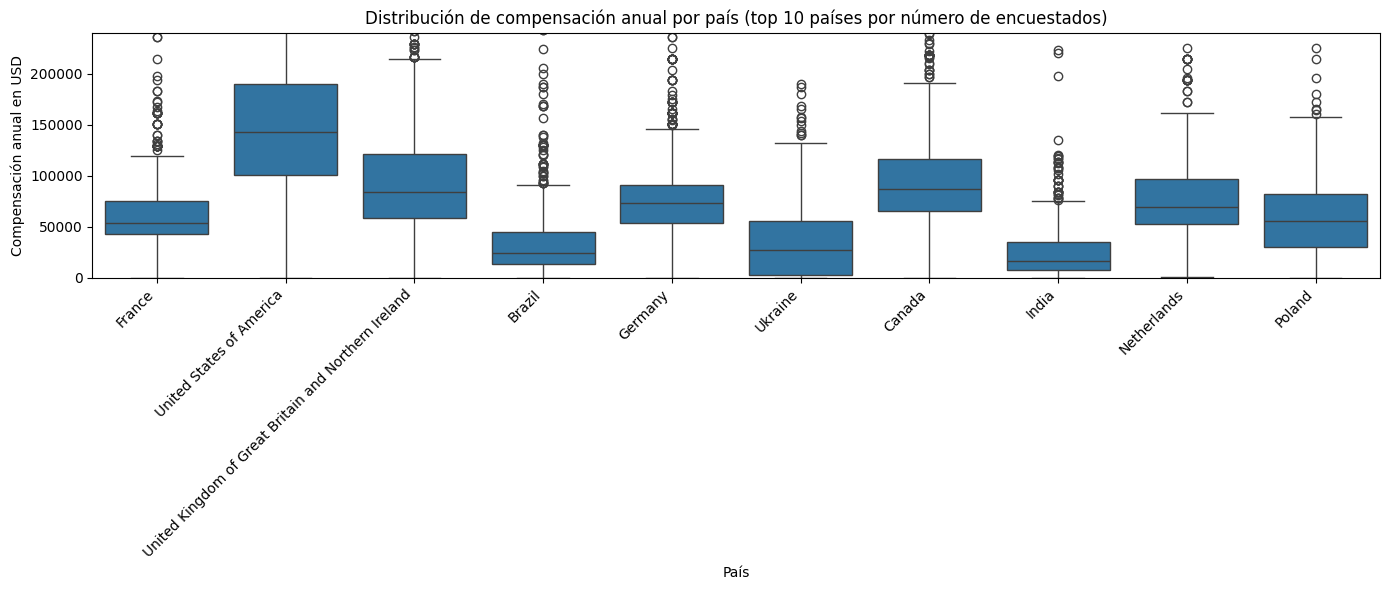

In [5]:
## Write your code here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# --- 1️⃣ Verificar que existan las columnas necesarias ---
required_cols = ['ConvertedCompYearly', 'Country']
for col in required_cols:
    if col not in df.columns:
        raise KeyError(f"⚠️ La columna '{col}' no se encuentra en el DataFrame.")

# --- 2️⃣ Convertir compensación a numérico y eliminar nulos ---
df['ConvertedCompYearly'] = pd.to_numeric(df['ConvertedCompYearly'], errors='coerce')
df_plot = df.dropna(subset=['ConvertedCompYearly', 'Country'])

# --- 3️⃣ Opcional: Seleccionar solo los 10 países con más encuestados ---
top_countries = df_plot['Country'].value_counts().head(10).index
df_plot = df_plot[df_plot['Country'].isin(top_countries)]

# --- 4️⃣ Crear boxplot ---
plt.figure(figsize=(14,6))
sns.boxplot(x='Country', y='ConvertedCompYearly', data=df_plot)
plt.ylim(0, df_plot['ConvertedCompYearly'].quantile(0.95))  # Limitar eje y al percentil 95 para mejor visualización
plt.title('Distribución de compensación anual por país (top 10 países por número de encuestados)')
plt.xlabel('País')
plt.ylabel('Compensación anual en USD')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


<h3>Step 6: Removing Outliers from the Dataset</h3>


**Task**: Create a new DataFrame by removing outliers from the `ConvertedCompYearly` column to get a refined dataset for correlation analysis.


In [6]:
## Write your code here
import pandas as pd
import numpy as np

# --- 1️⃣ Convertir ConvertedCompYearly a numérico y eliminar nulos temporalmente ---
comp = pd.to_numeric(df['ConvertedCompYearly'], errors='coerce')

# --- 2️⃣ Calcular IQR ---
Q1 = comp.quantile(0.25)
Q3 = comp.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# --- 3️⃣ Crear nuevo DataFrame sin outliers ---
df_no_outliers = df[(comp >= lower_bound) & (comp <= upper_bound)].copy()

# --- 4️⃣ Validar tamaño del nuevo DataFrame ---
print(f"📊 Tamaño original del DataFrame: {df.shape}")
print(f"📊 Tamaño del DataFrame sin outliers: {df_no_outliers.shape}")
print(f"Se eliminaron {df.shape[0] - df_no_outliers.shape[0]} filas con outliers.")


📊 Tamaño original del DataFrame: (65437, 114)
📊 Tamaño del DataFrame sin outliers: (22457, 114)
Se eliminaron 42980 filas con outliers.


<h3>Step 7: Finding Correlations Between Key Variables</h3>


**Task**: Calculate correlations between `ConvertedCompYearly`, `WorkExp`, and `JobSatPoints_1`. Visualize these correlations with a heatmap.


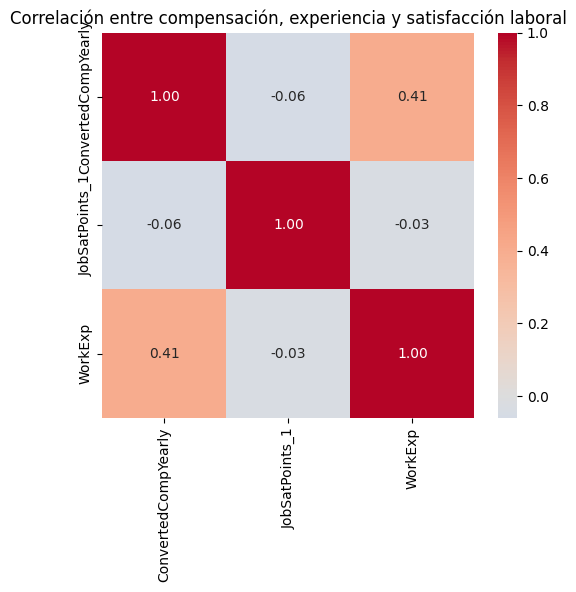

📊 Matriz de correlación:
                     ConvertedCompYearly  JobSatPoints_1   WorkExp
ConvertedCompYearly             1.000000       -0.059643  0.406993
JobSatPoints_1                 -0.059643        1.000000 -0.032388
WorkExp                         0.406993       -0.032388  1.000000


In [7]:
## Write your code here
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# --- 1️⃣ Verificar que las columnas existan ---
columns_needed = ['ConvertedCompYearly', 'JobSatPoints_1']
for col in columns_needed:
    if col not in df_no_outliers.columns:
        raise KeyError(f"⚠️ La columna '{col}' no se encuentra en el DataFrame.")

# Usar WorkExp o YearsCodePro según disponibilidad
if 'WorkExp' in df_no_outliers.columns:
    columns_needed.append('WorkExp')
elif 'YearsCodePro' in df_no_outliers.columns:
    columns_needed.append('YearsCodePro')
else:
    raise KeyError("⚠️ No se encontró ninguna columna de experiencia laboral (WorkExp/YearsCodePro).")

# --- 2️⃣ Seleccionar columnas numéricas y eliminar nulos ---
corr_data = df_no_outliers[columns_needed].apply(pd.to_numeric, errors='coerce').dropna()

# --- 3️⃣ Calcular matriz de correlación ---
corr_matrix = corr_data.corr()

# --- 4️⃣ Visualización con heatmap ---
plt.figure(figsize=(6,5))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title('Correlación entre compensación, experiencia y satisfacción laboral')
plt.show()

# --- 5️⃣ Mostrar matriz de correlación ---
print("📊 Matriz de correlación:")
print(corr_matrix)


<h3>Step 8: Scatter Plot for Correlations</h3>


**Task**: Create scatter plots to examine specific correlations between `ConvertedCompYearly` and `WorkExp`, as well as between `ConvertedCompYearly` and `JobSatPoints_1`.


In [8]:
## Write your code here


IndentationError: unexpected indent (761117590.py, line 2)

<h3>Summary</h3>


In this lab, you practiced essential skills in correlation analysis by:

- Examining the distribution of yearly compensation with histograms and box plots.
- Detecting and removing outliers from compensation data.
- Calculating correlations between key variables such as compensation, work experience, and job satisfaction.
- Visualizing relationships with scatter plots and heatmaps to gain insights into the associations between these features.

By following these steps, you have developed a solid foundation for analyzing relationships within the dataset.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
